# Analysis

1. Based on the summary statistics, the performance of Capomulin and Ramicane is similar. The smaller mean value shows they are more effective than other drug regimens. Furthermore, When the mean and median are very close, it usually means that the data is relatively symmetrical and may be close to a normal distribution. This indicates that the data is distributed fairly evenly on both sides of the central point, with no severe skewness. This provides evidence that Raicane is the most similar to Capomulin.
A small variance means the data has a low degree of dispersion, and the data points are more concentrated around the mean. This is consistent with the value of standard deviation error. A small standard deviation means that most data points are close to the mean, with the data concentrated within a small range, indicating low variability.
Therefore, we can say Raicane's effect is the closest to the target Capomulin and is superior to the effects of other treatment regimens, according to the statistics value of "drug_regimen_summary".

2. The bar chart shows how long used for each regimen. Capomulin and Ramicane are very close and far more than others. Propriva is the least, which means people did not give many resources to it, due to the effect on tumor volume. This can prove the above conclusion of what we did.

3. The pie chart shows that 50.4% and 49.6% respectively of male and female mice were used by each regimen. We can say gender is not a factor that affects the effectiveness of the regime. 

4. The box chart shows the distribution of tumor volume by those four treatment regimens. The high mean value indicates the effect of Infubinol and Ceftamin is less than that of Capomulin and Ramicane. Infubinol also has an outlier. Outliers may represent the specificity or uniqueness of the sample, such as an abnormal response under certain conditions. For example, it showed the same effect as Capomulin and Ramicane. On the other hand, Capomulin and Ramicane are effective on tumor volume, even Ramicane better as its smaller mean value.

5. The line chart shows the time point for a single mouse treated with Capomulin. As the time point increases, the tumor volume decreases in the long run. However, it still has some parts slope up. This is what the pharmaceutical company should figure out what happened in those time points. Moreover, the correlation between mouse weight and the average tumor volume is 0.84, which suggests a strong linear relationship. A positive slope indicates that there is a positive correlation between weight and tumor volume. When weight increases, the average tumor volume increases as well.

# Import Data

In [1]:
# Import pandas and matplot
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Open files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [3]:
# Read files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Prepare the Data

In [4]:
# Combine the data into a single dataset
study_results_complete = pd.merge(study_results,mouse_metadata,how="left",on=["Mouse ID"])

In [5]:
# Display the data table for preview
study_results_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice
mice_count = study_results_complete["Mouse ID"].nunique()
print(f"Total number of mice: {mice_count}")

Total number of mice: 249


In [7]:
# Format Mouse ID as string, format Timepoint as integer
study_results_complete['Mouse ID'] = study_results_complete['Mouse ID'].astype(str)
study_results_complete['Timepoint'] = study_results_complete['Timepoint'].astype(int)
#Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mouse_ids = study_results_complete.loc[
    study_results_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
# Print result
print(repr(duplicate_mouse_ids))

array(['g989'], dtype=object)


In [8]:
# Get all the data for the duplicate mouse ID
duplicate_mouse_data = study_results_complete.loc[study_results_complete["Mouse ID"] == "g989"]

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_df = study_results_complete[study_results_complete["Mouse ID"] != "g989"]

In [10]:
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame
mice_count_clean = cleaned_df["Mouse ID"].nunique()
print(f"The number of mice in the clean DataFrame : {mice_count_clean}")

The number of mice in the clean DataFrame : 248


# Summary Statistics

In [12]:
# Import Numpy
import numpy as np
# Calculate the mean of Tumor Volume
Mean_Tumor_Volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().round(2)

In [13]:
# Print Result
Mean_Tumor_Volume

Drug Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.32
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Calculate the median of Tumor Volume
Median_Tumor_Volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().round(2)

In [15]:
# Print Result
Median_Tumor_Volume

Drug Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.45
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Calculate the Variance of Tumor Volume
Variance_Tumor_Volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().round(2)

In [17]:
# Print Result
Variance_Tumor_Volume

Drug Regimen
Capomulin    24.95
Ceftamin     39.29
Infubinol    43.13
Ketapril     68.55
Naftisol     66.17
Placebo      61.17
Propriva     43.85
Ramicane     23.49
Stelasyn     59.45
Zoniferol    48.53
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Calculate the Std of Tumor Volume
Std_Tumor_Volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().round(2)

In [19]:
# Print Result
Std_Tumor_Volume

Drug Regimen
Capomulin    4.99
Ceftamin     6.27
Infubinol    6.57
Ketapril     8.28
Naftisol     8.13
Placebo      7.82
Propriva     6.62
Ramicane     4.85
Stelasyn     7.71
Zoniferol    6.97
Name: Tumor Volume (mm3), dtype: float64

In [20]:
# Calculate the Std of Tumor Volume
count = study_results_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
Stde_Tumor_Volume = (Std_Tumor_Volume / np.sqrt(count)).round(2)

In [21]:
# Print Result
Stde_Tumor_Volume

Drug Regimen
Capomulin    0.33
Ceftamin     0.47
Infubinol    0.49
Ketapril     0.60
Naftisol     0.60
Placebo      0.58
Propriva     0.52
Ramicane     0.32
Stelasyn     0.57
Zoniferol    0.52
Name: Tumor Volume (mm3), dtype: float64

In [22]:
# Assemble the resulting series into a single summary DataFrame
drug_regimen_summary = pd.DataFrame({
    "Mean Tumor Volume": Mean_Tumor_Volume,
    "Median Tumor Volume": Median_Tumor_Volume,
    "Tumor Volume Variance": Variance_Tumor_Volume,
    "Tumor Volume Std. Dev.": Std_Tumor_Volume,
    "Tumor Volume Std. Err.": Stde_Tumor_Volume
})    
# Set index name
drug_regimen_summary.index.name = "Drug Regimen"

In [23]:
# Print Result
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.52
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Create Bar Charts and Pie Charts

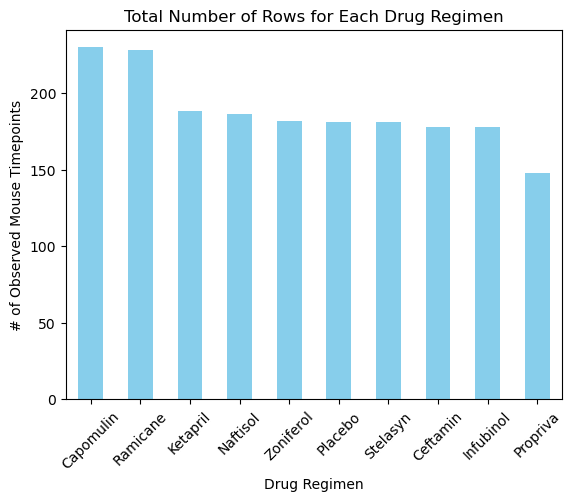

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
regimen_counts = cleaned_df.groupby('Drug Regimen').size()
# Sort the regimen counts in descending order
regimen_counts = regimen_counts.sort_values(ascending=False)
# Ploting
ax = regimen_counts.plot(kind='bar', color='skyblue')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_title('Total Number of Rows for Each Drug Regimen')
ax.set_xticks(ax.get_xticks())  
ax.set_xticklabels(regimen_counts.index, rotation=45)    
plt.show()

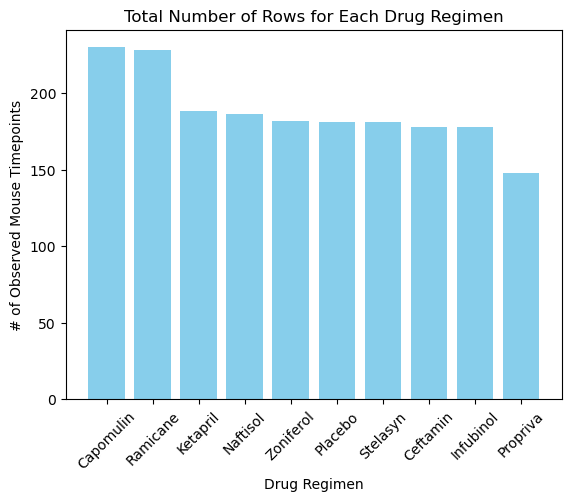

In [25]:
# Count the number of rows for each Drug Regimen
regimen_counts = cleaned_df.groupby('Drug Regimen').size()
# Sort the regimen counts in descending order
regimen_counts = regimen_counts.sort_values(ascending=False)
# Ploting
plt.bar(regimen_counts.index, regimen_counts, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

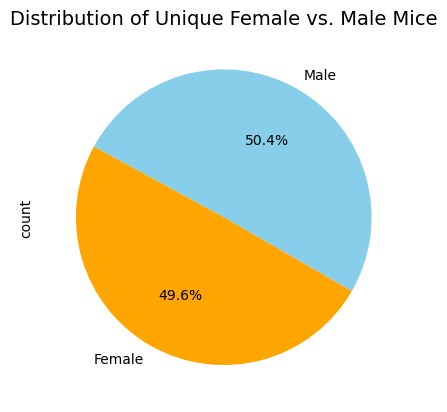

In [26]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Build DataFrame
df = pd.DataFrame(cleaned_df)
# Drop duplicates
unique_mice = df.drop_duplicates(subset=['Mouse ID'])
# Count sex numbers
gender_distribution = unique_mice['Sex'].value_counts()
# Ploting
ax = gender_distribution.plot.pie(
    autopct="%1.1f%%",  
    startangle=-30,   
    colors=['skyblue', 'orange'],  
)
plt.title('Distribution of Unique Female vs. Male Mice', fontsize=14)
# Pie chart
plt.show()

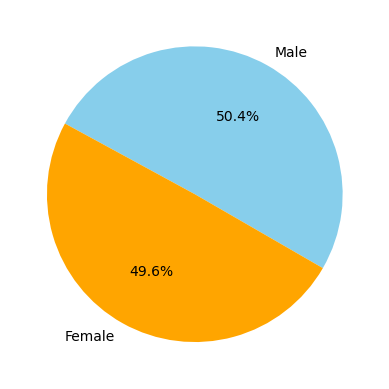

In [27]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Drop duplicates
unique_mice = df.drop_duplicates(subset=['Mouse ID'])
# Count sex numbers
gender_distribution = unique_mice['Sex'].value_counts()
# Ploting
label = gender_distribution.index
sizes = gender_distribution.values
colors = ['skyblue', 'orange']
plt.pie(sizes, labels=label, colors=colors,
        autopct="%1.1f%%", startangle=-30)
# Pie chart
plt.show()

# Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Getting the last (greatest) timepoint for each mouse
max_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_df, cleaned_df, how="left", on=['Mouse ID', 'Timepoint'])

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Locate the rows in the merged DataFrame that correspond to each treatment
for treatment in treatments:
    treatment_df = merged_df[merged_df['Drug Regimen'] == treatment]
    tumor_volume_series = treatment_df['Tumor Volume (mm3)']
    
    # Append the series final tumor volumes for each drug to the empty list
    tumor_volumes.append(tumor_volume_series)

# Calculate the IQR and quantitatively determine if there are any potential outliers
for i, treatment in enumerate(treatments):
    quartiles = tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Finding outliers
    outliers = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]
    
    # print results
    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


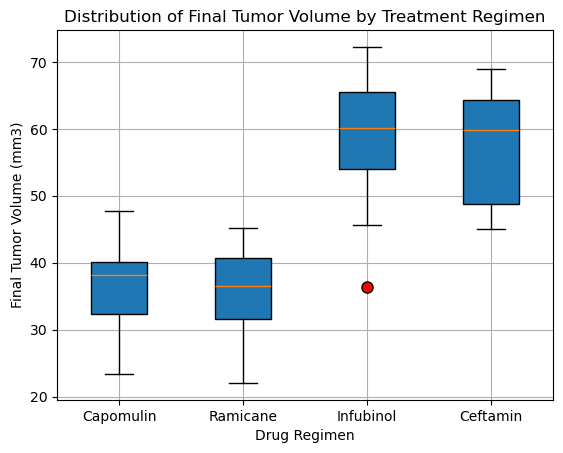

In [29]:
# Create a box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, alpha=1)
boxplot = plt.boxplot(tumor_volumes, labels=treatments, patch_artist=True, flierprops=flierprops)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume by Treatment Regimen')
plt.grid(True)
plt.show()

In [30]:
# Filter the dataset for a single mouse treated with Capomulin
single_mouse_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == 'l509')]

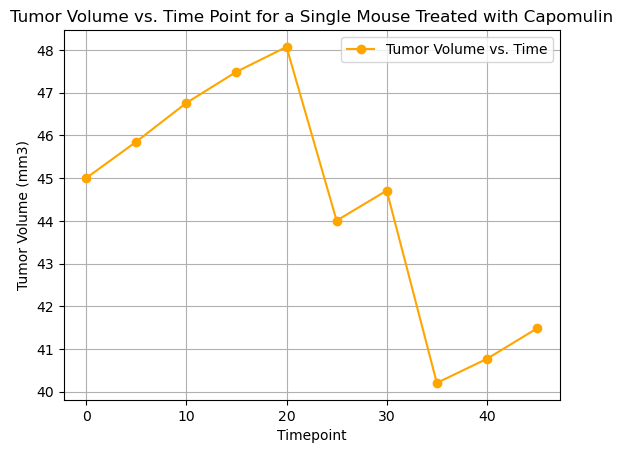

In [31]:
# Create a line plot for tumor volume vs. time point
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='orange', label='Tumor Volume vs. Time')
plt.title('Tumor Volume vs. Time Point for a Single Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc="best")
plt.grid(True)
plt.show()

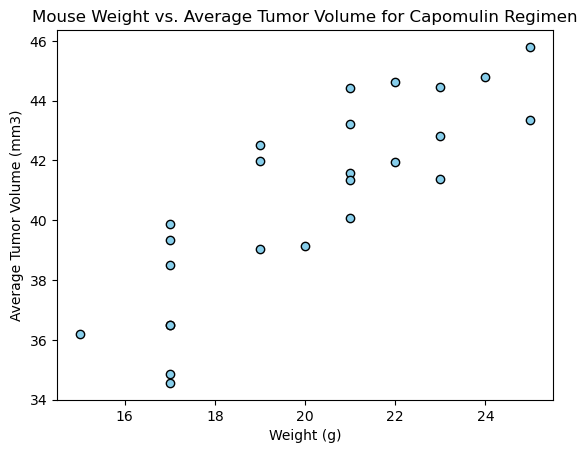

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Create new DateFrame sorted by Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Get the weight of each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
# Ploting
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='skyblue', edgecolors='black', alpha=1)
# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.show()

# Correlation and Regression

In [33]:
# Calculate the correlation coefficient and a linear regression model
correlation = np.corrcoef(mouse_weight, avg_tumor_volume)[0, 1].round(2)
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')

The correlation between mouse weight and the average tumor volume is 0.84


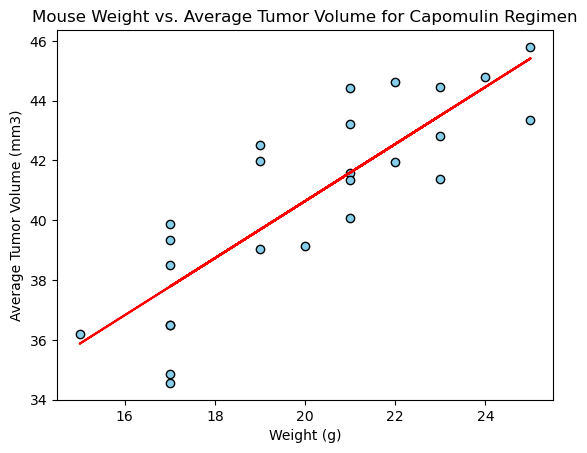

In [34]:
import matplotlib.pyplot as plt
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weight, avg_tumor_volume)
# Plot scatter plot and regression line
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='skyblue', edgecolors='black', alpha=1)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Plot regression line
regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red', label='Regression Line')
plt.show()